# Boston Housing Project

Import libraries

In [27]:
import pandas as pd
from sklearn import linear_model, preprocessing, svm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn import model_selection

read file & load data

In [2]:
#load file
TRAIN_FILE = 'boston_housing_data/train.csv'             # Training set filename
TEST_FILE = 'boston_housing_data/test.csv'  

In [3]:
# Global variable
nan_cache = {}                                    # Cache for test set missing data
# Save missing value statistics from train data for filling test data

EDA(Exploratory Data Analysis)
1. Data Overview
2. check missing values
3. Data visualization

In [4]:
#load data using pandas
train_data = pd.read_csv(TRAIN_FILE)
test_data = pd.read_csv(TEST_FILE)

print(type(train_data)) 
train_data.pop('ID')

#check columns name 
train_data.head()  #[ID, crim, zn, indus, chas, nox, rm, age, dis. rad, tax, ptratio, black, lstat, medv]

#check statistics
train_data.describe()

#check missing values
missing_values_train = train_data.isna().sum() 
print(missing_values_train)    #no missing values

<class 'pandas.core.frame.DataFrame'>
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


we can see there is no missing value.
Next, we transform 'chas' to one-hot encoding.

In [5]:
# one hot encoding
def one_hot_encoding(data):
	"""
	:param data: pd.DataFrame, the 2D data
	------------------------------------------------
	Extract important categorical data, making it a new one-hot vector
	"""
	# One hot encoding for a new category chas_y
	data['chas_y']=  0
	data.loc[data.chas == 1, 'chas_y'] = 1
	# One hot encoding for a new category chas_n
	data['chas_n'] = 0
	data.loc[data.chas == 0, 'chas_n'] = 1
	# No need chas anymore!
	data.pop('chas')

	return data

first, check the distribution of Y ('medv') 

In [6]:
# check Y: medv 是否是常態分佈，或者有偏態

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


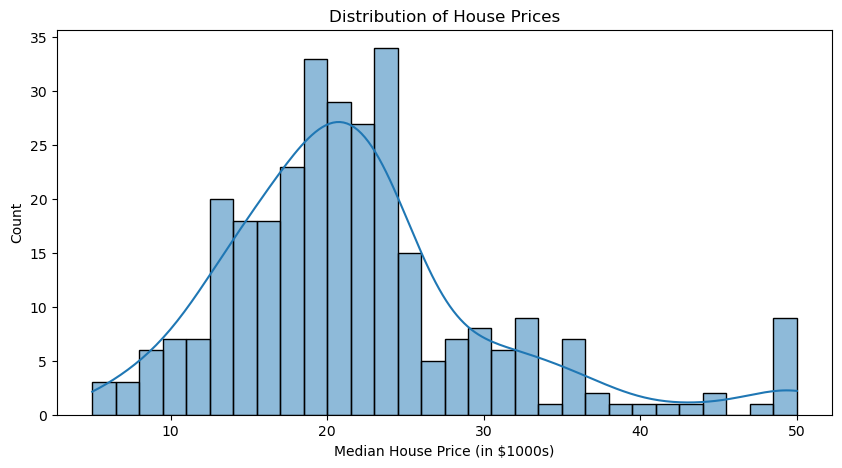

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(train_data["medv"], bins=30, kde=True)
plt.xlabel("Median House Price (in $1000s)")
plt.title("Distribution of House Prices")
plt.show()

##接近常態分佈，沒有明顯的右偏，故不做轉換

In [9]:
#查看crime & mdev的關聯

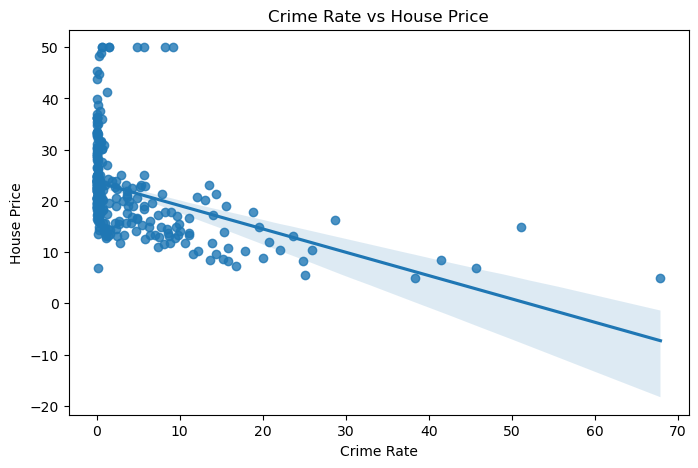

In [11]:
plt.figure(figsize=(8,5))
sns.regplot(x=train_data["crim"], y=train_data["medv"])
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
plt.title("Crime Rate vs House Price")
plt.show()

Second, check the correlation between two features.

In [12]:
#查看所有features兩兩兩correlation 的heatmap

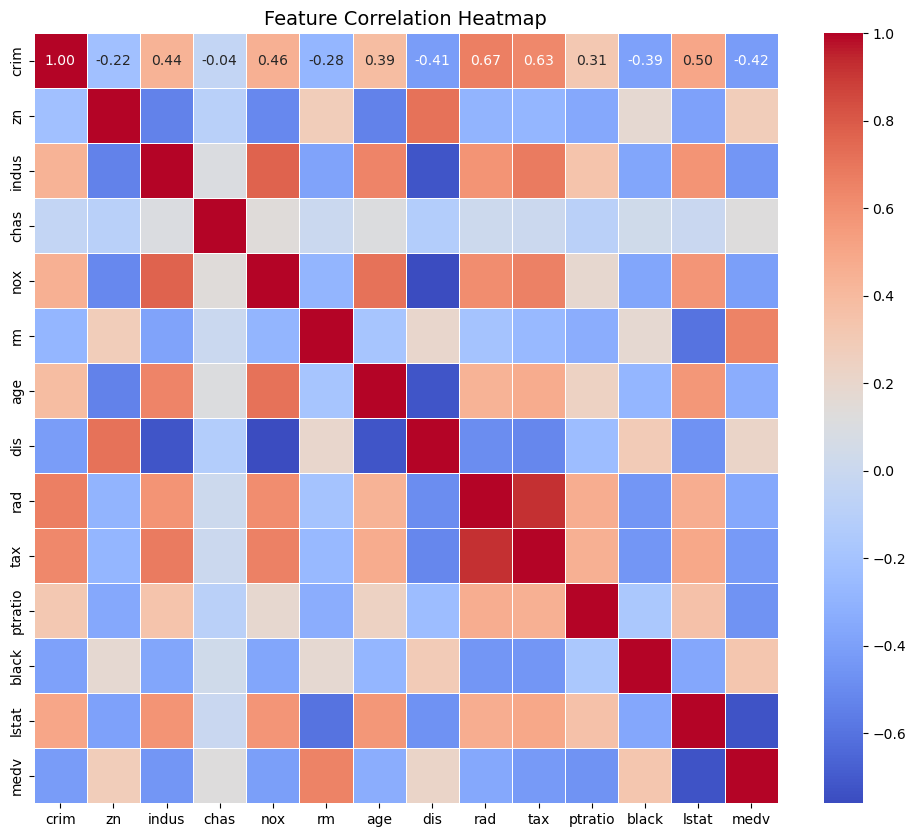

In [13]:
# 設置圖表大小
plt.figure(figsize=(12, 10))

# 繪製相關係數矩陣的 heatmap
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 設置標題
plt.title("Feature Correlation Heatmap", fontsize=14)

# 顯示圖表
plt.show()


third, draw the boxplot of all features:
1. outliers
2. skewed distribution

In [14]:
# 畫所有features的 boxplot，查看是否有極端值

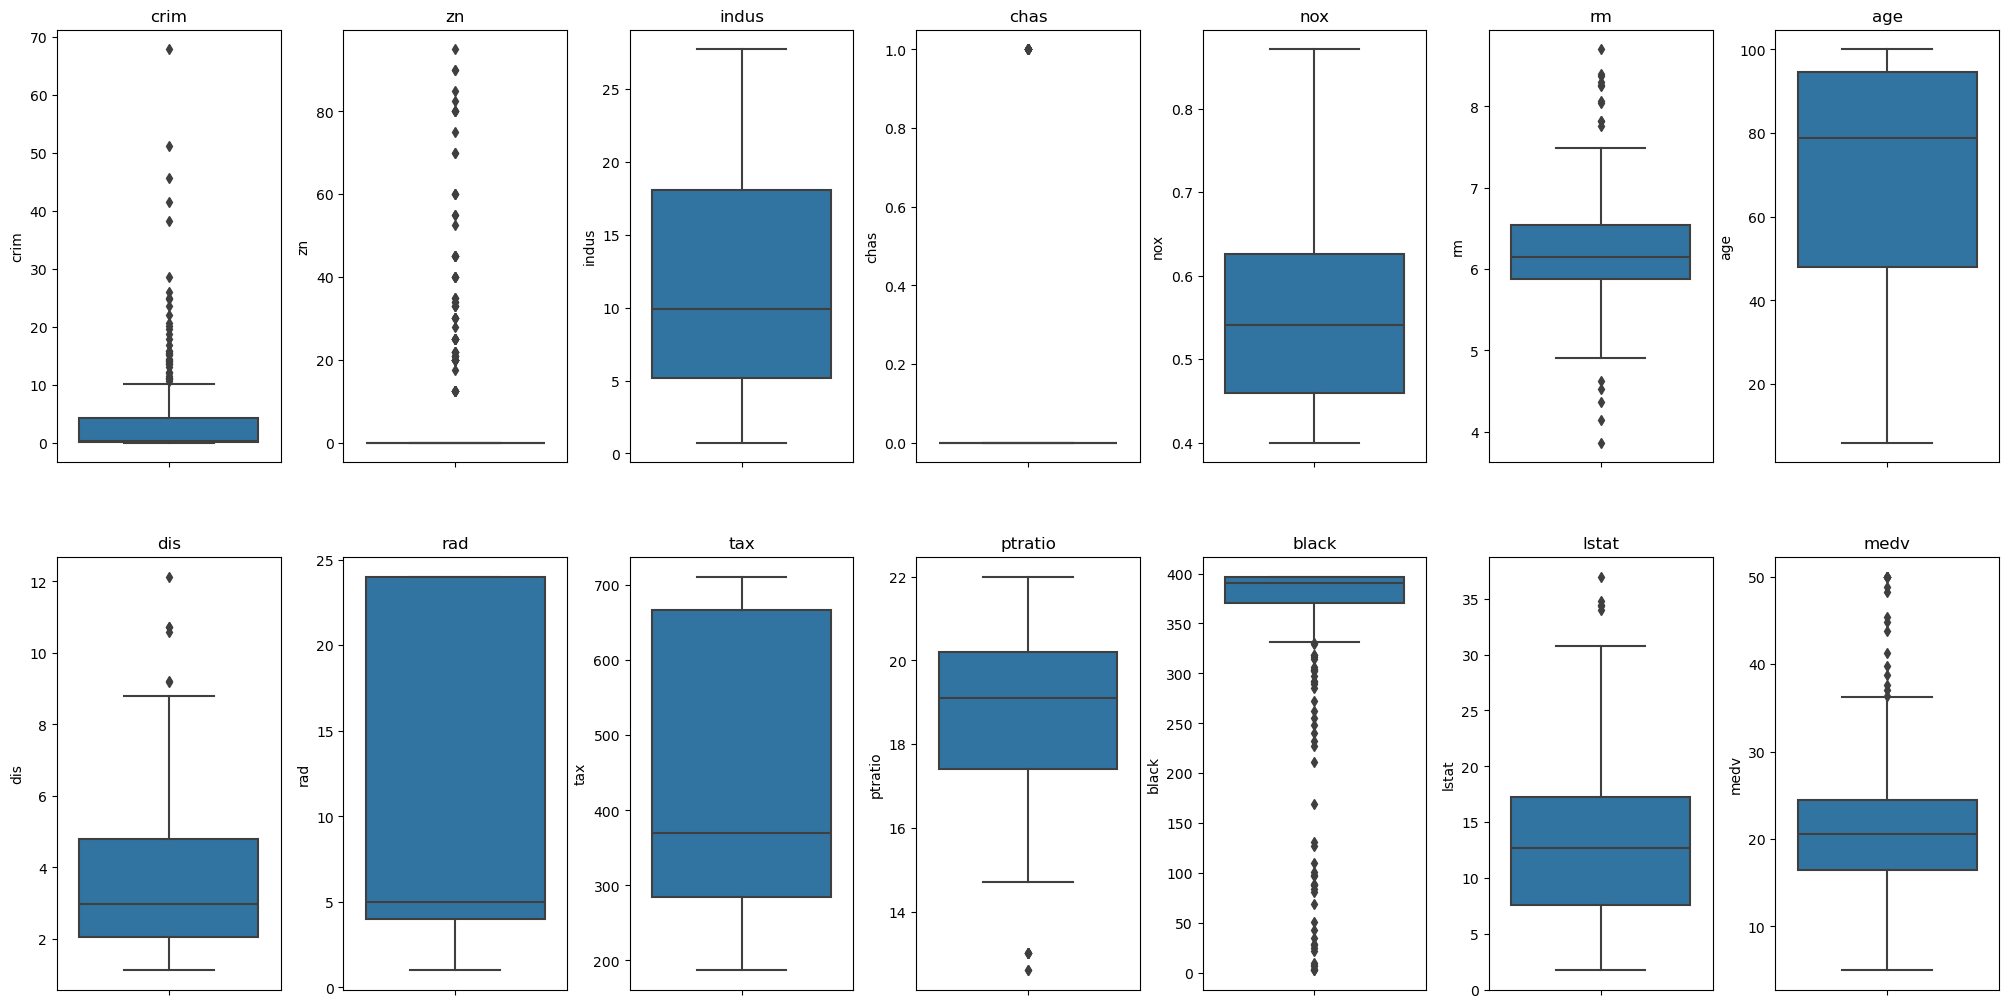

In [15]:
# 計算需要的 subplot 數量
num_cols = len(train_data.columns)  # 變數數量
num_cols_per_row = 7  # 每列最多放 7 張圖
num_rows = math.ceil(num_cols / num_cols_per_row)  # 計算總共需要幾列

# 建立足夠的子圖
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 10))

# 讓 axs 變成 1D 陣列，方便索引
axs = axs.flatten()

# 繪製 boxplot 並標記 column name
for index, col in enumerate(train_data.columns):
    sns.boxplot(y=train_data[col], data=train_data, ax=axs[index])
    axs[index].set_title(col)  # 加上 column 名稱

# 調整 layout，避免標題重疊
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [16]:
#查看所有features的distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

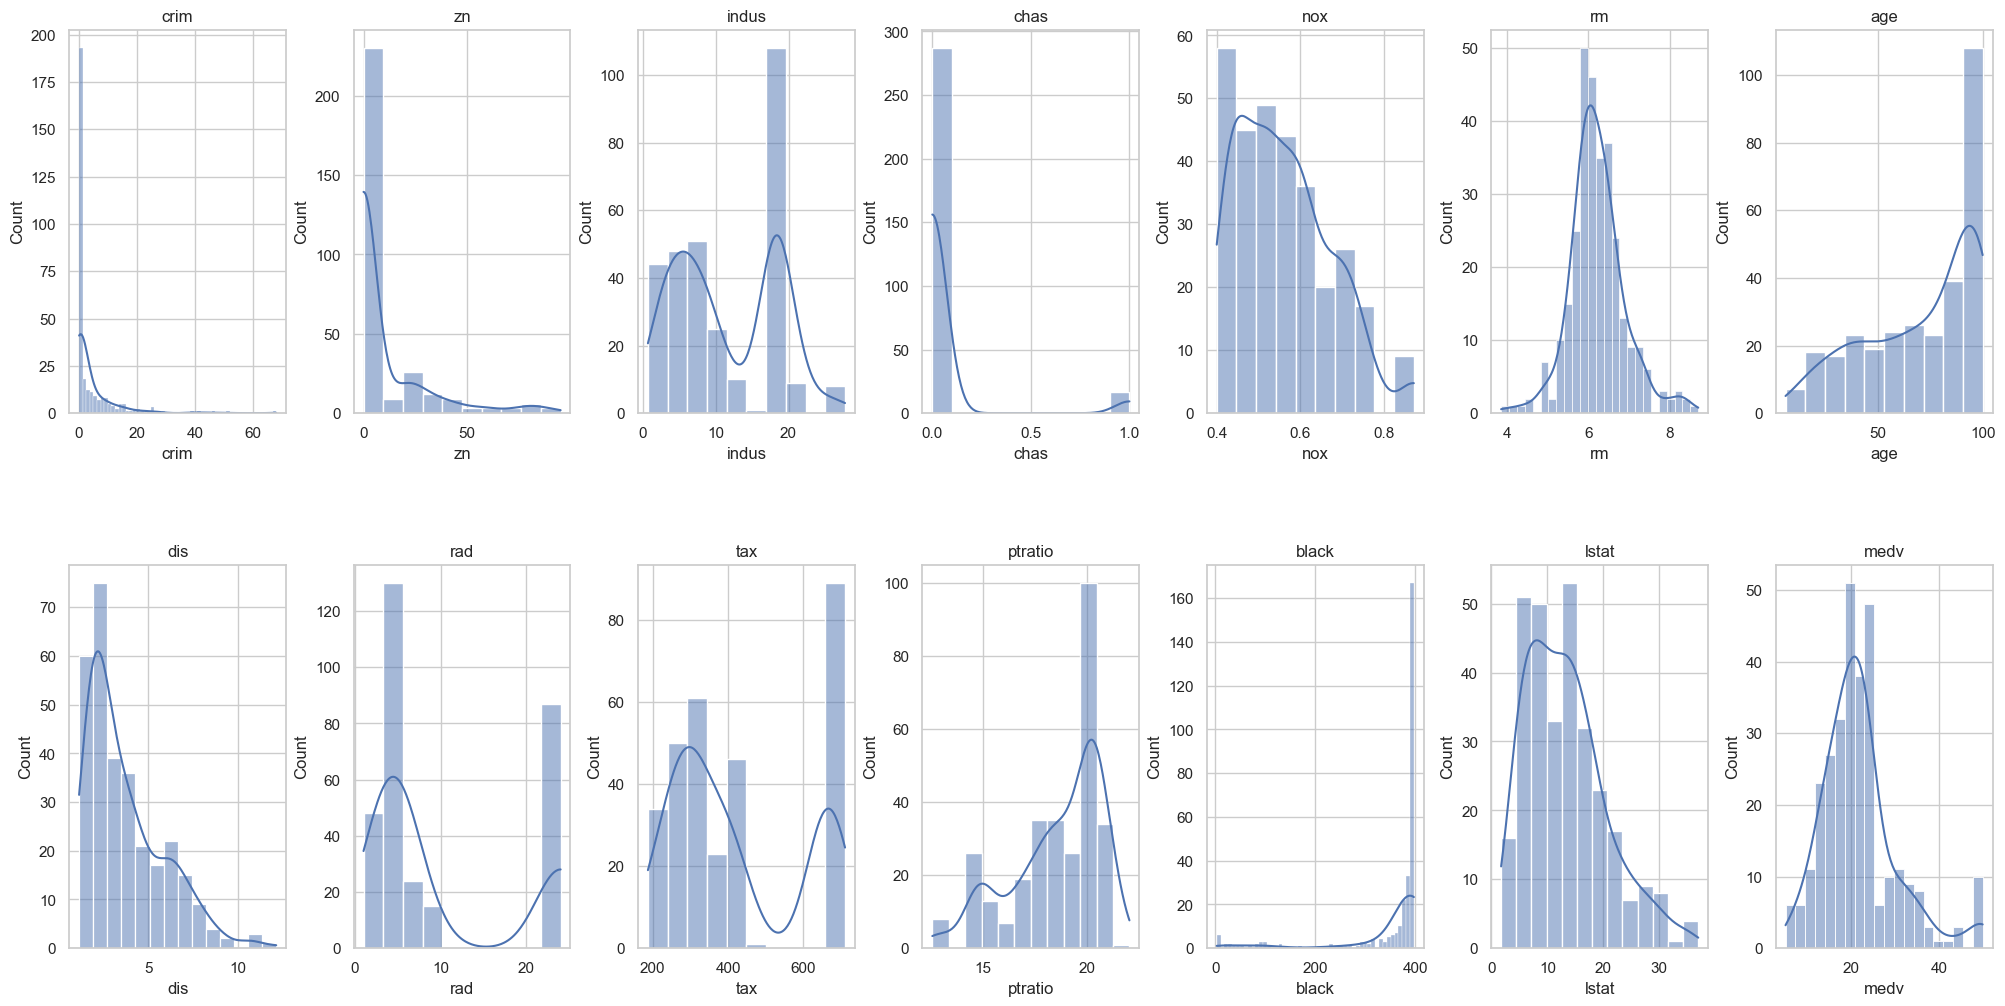

In [17]:
# 確保 Seaborn 版本適用
sns.set(style="whitegrid")

# 計算所需的 subplot 數量
num_cols = len(train_data.columns)
num_cols_per_row = 7  # 每列最多 7 個圖
num_rows = math.ceil(num_cols / num_cols_per_row)

# 創建子圖
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 10))
axs = axs.flatten()  # 轉成 1D 陣列，方便索引

# 繪製直方圖
for index, (col, data) in enumerate(train_data.items()):
    sns.histplot(data, ax=axs[index], kde=True)  # `kde=True` 會顯示密度曲線
    axs[index].set_title(col)  # 標題顯示變數名稱

# 調整佈局，避免圖重疊
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [18]:
print(train_data.skew())  # 計算所有數值變數的偏態係數

#Skewness（偏態係數） 衡量分佈的對稱程度：
#偏態 Skewness > 1 → 嚴重右偏 :crim, zn, 
#偏態 Skewness < -1 → 嚴重左偏: black

crim       3.936700
zn         2.477586
indus      0.175266
chas       3.884629
nox        0.679385
rm         0.474972
age       -0.666026
dis        1.154932
rad        0.873943
tax        0.555308
ptratio   -0.847753
black     -2.618298
lstat      0.844742
medv       1.211115
dtype: float64


In [19]:
##將右偏數據log
train_data["log_crim"] = np.log1p(train_data["crim"])  # log(1+x) 避免 log(0) 問題
train_data["zn"] = np.log1p(train_data["zn"]) 

##將左偏數據log
# 反轉數據
train_data["reversed_black"] = train_data["black"].max() - train_data["black"]
# 對反轉後的數據取 log
train_data["log_black"] = np.log1p(train_data["reversed_black"])

Data Wrangling

In [20]:
# Data cleaning
def data_preprocess(filename, mode='Train'):
    """
    :param filename: str, the csv file to be read into by pd
    :param mode: str, the indicator of training mode or testing mode
    -----------------------------------------------
    This function reads in data by pd, changing string data to float, 
    and finally tackling missing data showing as NaN on pandas
    """

    # Read in data as a column-based DataFrame
    data = pd.read_csv(filename)
    print(data.count())  # 重要！可以看出每個欄位的數量＆有無缺失值

    # 將右偏數據 log 轉換
    data["crim"] = np.log1p(data["crim"])  # ⚠️ 刪除 inplace=True，因為 np.log1p() 不支援
    data["zn"] = np.log1p(data["zn"])

    # 將左偏數據 log 轉換
    # 反轉數據
    data["reversed_black"] = data["black"].max() - data["black"]
    # 對反轉後的數據取 log
    data["log_black"] = np.log1p(data["reversed_black"])

    # One-Hot Encoding（請確保 `one_hot_encoding()` 是定義過的函數）
    data = one_hot_encoding(data)

    return data


In [21]:
# Data cleaning
train_data = data_preprocess(TRAIN_FILE, mode='Train')
test_data = data_preprocess(TEST_FILE, mode='Test')

ID         304
crim       304
zn         304
indus      304
chas       304
nox        304
rm         304
age        304
dis        304
rad        304
tax        304
ptratio    304
black      304
lstat      304
medv       304
dtype: int64
ID         202
crim       202
zn         202
indus      202
chas       202
nox        202
rm         202
age        202
dis        202
rad        202
tax        202
ptratio    202
black      202
lstat      202
dtype: int64


build model
- pre-modeling 
- we should extract y, x
- normalize or standardize x 
- polynomial or not


In [22]:
#check all features
print(train_data.columns)
print(test_data.columns)

Index(['ID', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'reversed_black', 'log_black',
       'chas_y', 'chas_n'],
      dtype='object')
Index(['ID', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'reversed_black', 'log_black', 'chas_y',
       'chas_n'],
      dtype='object')


In [23]:
# Extract true labels
Y = train_data.pop('medv')

In [38]:
# Extract features ('crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'log_black', 'chas_y','chas_n')

features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'log_black', 'chas_y','chas_n']
train_data = train_data[features]

In [40]:
# Normalization / Standardization
normalizer = preprocessing.MinMaxScaler()
x_train = normalizer.fit_transform(train_data)

In [28]:
# **新增 GridSearchCV 來自動調參**
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.05, 0.1],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

# 設置 SVR 模型
svr = svm.SVR(kernel='rbf')

# 使用 GridSearchCV 來尋找最佳參數
grid_search = model_selection.GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, Y)

# 找到最佳參數
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}


choose model: SVM

In [29]:
#h = svm.SVR(kernel='rbf', C=1.0, gamma='scale')
h = svm.SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])

In [30]:
#modeling

In [31]:
regressor = h.fit(x_train, Y)

In [32]:
#evaluation

In [33]:
#Predicting R2 Score the Train set results
r2_train = regressor.score(x_train, Y)  # 計算訓練集的 R²
print(f"Training R² Score: {r2_train:.4f}")  # 越接近 1 越好

#Predicting R2 Score the Test set results

Training R² Score: 0.7756


In [34]:
# 在訓練集上執行 5 折交叉驗證
cv_scores = model_selection.cross_val_score(regressor, x_train, Y, cv=2, scoring='r2')

# 計算平均 R² 分數
print(f"Cross-Validation R² Score: {cv_scores.mean():.4f}")

Cross-Validation R² Score: 0.5778


In [36]:
# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

NameError: name 'mean_squared_error' is not defined

In [102]:
# Test dataset
#Extract features 
test_data = test_data[features]



# normalize
x_test = normalizer.transform(test_data)

#predict
predictions = regressor.predict(x_test)

#out file
out_file(predictions, 'pandas_sklearn_svm.csv')



Writing predictions to --> pandas_sklearn_svm.csv


In [103]:
#out file
def out_file(predictions, filename):
	"""
	: param predictions: numpy.array, a list-like data structure that stores 0's and 1's
	: param filename: str, the filename you would like to write the results to
	"""
	print('\n===============================================')
	print(f'Writing predictions to --> {filename}')
	with open(filename, 'w') as out:
		out.write('PassengerId,Survived\n')
		start_id = 1
		for ans in predictions:
			out.write(str(start_id)+','+str(ans)+'\n')
			start_id += 1
	print('===============================================')
